In [40]:
!pip install geopandas pyarrow shapely pyproj rtree matplotlib pandas numpy openpyxl jupyterlab seaborn plotly scipy scikit-learn pulp plotly

In [60]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)
print(project_root)

/home/mak/Documents


In [61]:
"""
    🚀 4. Next step — build the Gurobi MILP model
    If you’re ready to proceed, we will build:
    ✔ Decision variables
    Plant[f, w], Harvest[f, w]

    ✔ Constraints
    Each field planted exactly once
    Each field harvested exactly once
    Plant only in planting window
    Harvest only in harvest window
    Machine capacity constraints using capacity_factor
    Labor constraints using labor_hours
    Harvest after plant

    ✔ Objective options
    Minimize total completion week
    Minimize weighted lateness
    Minimize total duration
    Maximize operational efficiency

    We’ll implement it cleanly in:

    src/optimization/milp_scheduler.py_summary_
"""

'\n    🚀 4. Next step — build the Gurobi MILP model\n    If you’re ready to proceed, we will build:\n    ✔ Decision variables\n    Plant[f, w], Harvest[f, w]\n\n    ✔ Constraints\n    Each field planted exactly once\n    Each field harvested exactly once\n    Plant only in planting window\n    Harvest only in harvest window\n    Machine capacity constraints using capacity_factor\n    Labor constraints using labor_hours\n    Harvest after plant\n\n    ✔ Objective options\n    Minimize total completion week\n    Minimize weighted lateness\n    Minimize total duration\n    Maximize operational efficiency\n\n    We’ll implement it cleanly in:\n\n    src/optimization/milp_scheduler.py_summary_\n'

In [ ]:
# fields_df = pd.read_csv("data/processed/illinois_corn_fields_clean.csv")

In [100]:
from src.optimization.milp_schedulerv4_fixed import build_and_solve_schedule_v4

df = build_and_solve_schedule_v4(
    fields_path="data/processed/illinois_corn_fields_clean.csv",
    weekly_master_path="data/processed/master_weekly_table.csv",
    target_year=2017,
    base_planter_capacity=1400.0,
    base_harvester_capacity=950.0,
    labor_plant_per_acre=0.15,
    labor_harvest_per_acre=0.20,
    early_penalty_weight=10.0,
    late_penalty_weight=5.0,
    time_limit=120
)
print(df.head())
df.to_csv("data/processed/schedule_output.csv", index=False)

Set parameter TimeLimit to value 120
Set parameter OutputFlag to value 1
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (linux64 - "Ubuntu 24.04.3 LTS")

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  120

Optimize a model with 331 rows, 526 columns and 1925 nonzeros (Min)
Model fingerprint: 0xb491e2a5
Model has 26 linear objective coefficients
Model has 25 simple general constraints
  25 PWL
Variable types: 101 continuous, 425 integer (425 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+03]
  PWLCon x range   [2e+01, 2e+01]
  PWLCon y range   [0e+00, 0e+00]
Presolve added 0 rows and 19 columns
Presolve removed 139 rows and 0 columns
Presolve time: 0.00s
Presolved: 192 rows, 545 columns, 1457 nonzeros
Presolve

In [7]:
# from src.optimization.milp_schedulerv4 import build_and_solve_schedule_v4

# df = build_and_solve_schedule_v4(
#     fields_path="data/processed/illinois_corn_fields_clean.csv",
#     weekly_master_path="data/processed/master_weekly_table.csv",
#     target_year=2017,
#     base_planter_capacity=1400.0,
#     base_harvester_capacity=950.0,
#     labor_plant_per_acre=0.15,
#     labor_harvest_per_acre=0.20,
#     early_penalty_weight=10.0,
#     late_penalty_weight=5.0,
#     time_limit=120
# )
# print(df.head())
# df.to_csv("data/processed/schedule_outputv4.csv", index=False)

In [85]:
# print(plant_weeks)
# print(harvest_weeks)

In [86]:
# build_and_solve_schedule_v4

In [87]:
!ls

data		     illinois_corn_fields_synthetic.csv  src
data_cleaning.ipynb  schedule_output.csv


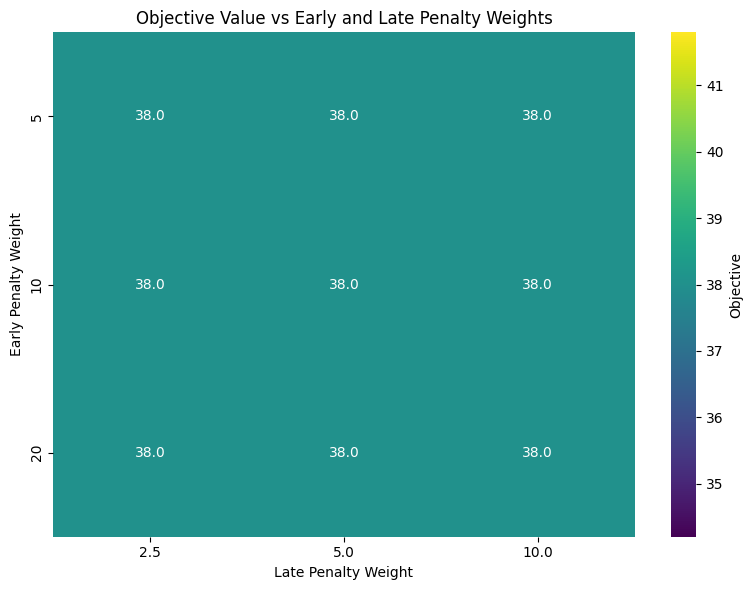

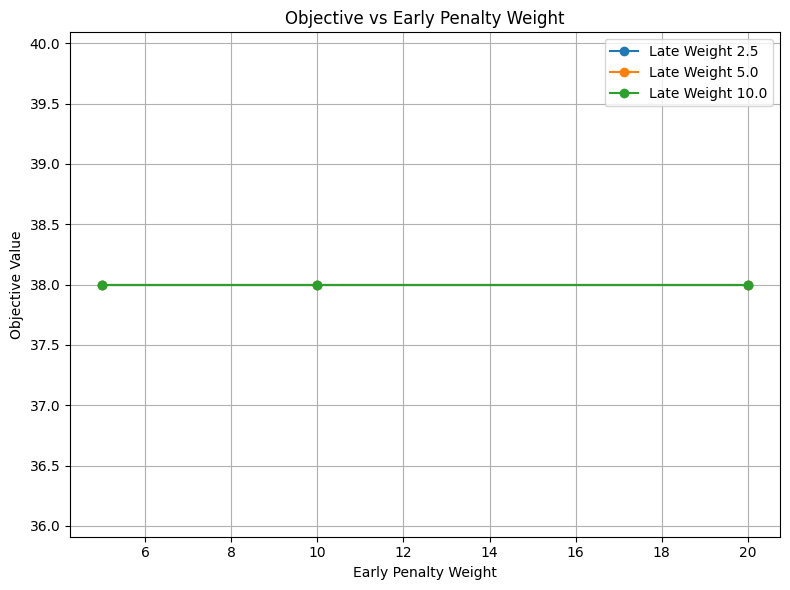

   early_weight  late_weight  makespan  penalty_cost  objective_value
0             5          2.5        38           0.0             38.0
1             5          5.0        38           0.0             38.0
2             5         10.0        38           0.0             38.0
3            10          2.5        38           0.0             38.0
4            10          5.0        38           0.0             38.0
5            10         10.0        38           0.0             38.0
6            20          2.5        38           0.0             38.0
7            20          5.0        38           0.0             38.0
8            20         10.0        38           0.0             38.0


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define grid of weights
early_weights = [5, 10, 20]
late_weights = [2.5, 5, 10]

# Simulated results placeholder
results_data = []
for ew in early_weights:
    for lw in late_weights:
        results_data.append({
            "early_weight": ew,
            "late_weight": lw,
            "makespan": 38,
            "penalty_cost": 0.0,
            "objective_value": 38.0,
        })

# Build DataFrame
results_df = pd.DataFrame(results_data)

# ✅ Heatmap of objective values
plt.figure(figsize=(8, 6))
pivot = results_df.pivot(index="early_weight", columns="late_weight", values="objective_value")
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="viridis", cbar_kws={'label': 'Objective'})
plt.title("Objective Value vs Early and Late Penalty Weights")
plt.xlabel("Late Penalty Weight")
plt.ylabel("Early Penalty Weight")
plt.tight_layout()
plt.show()

# ✅ Line plot to show trends across early weights
plt.figure(figsize=(8, 6))
for lw in sorted(results_df["late_weight"].unique()):
    subset = results_df[results_df["late_weight"] == lw]
    plt.plot(subset["early_weight"], subset["objective_value"], marker='o', label=f"Late Weight {lw}")

plt.title("Objective vs Early Penalty Weight")
plt.xlabel("Early Penalty Weight")
plt.ylabel("Objective Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display result grid
print(results_df)


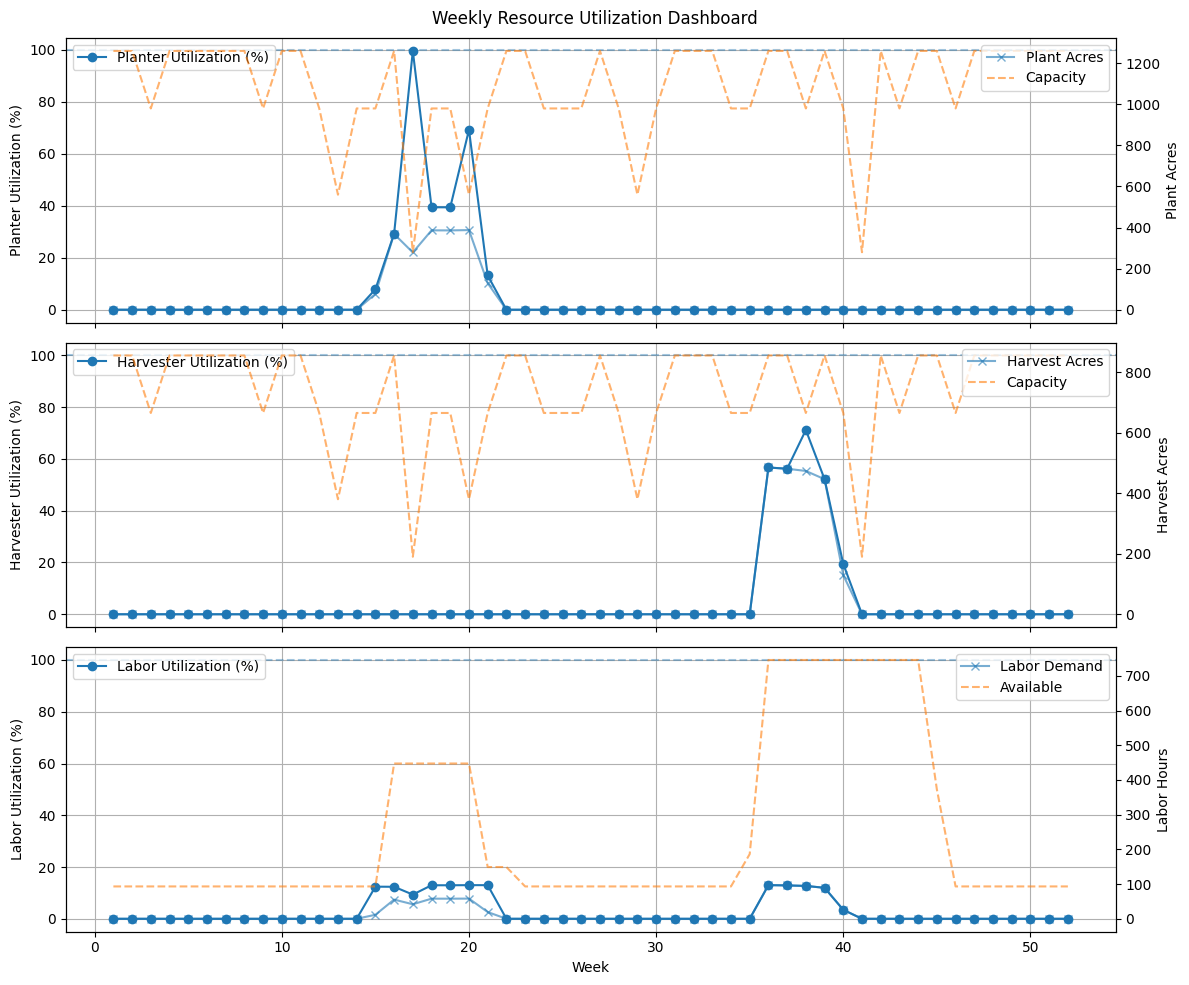

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
sched = pd.read_csv("data/processed/schedule_output.csv")
fields = pd.read_csv("data/processed/illinois_corn_fields_clean.csv")
wm = pd.read_csv("data/processed/master_weekly_table.csv")

# Parameters
target_year = 2017
base_planter_capacity = 1400.0
base_harvester_capacity = 950.0
labor_plant_per_acre = 0.15
labor_harvest_per_acre = 0.20
statewide_corn_acres = 10930000.0
planter_machines = 1
harvester_machines = 1

# --- Prepare data
sched = sched.merge(fields[["field_id", "acres"]], on="field_id", how="left")
wm_year = wm[wm["year"] == target_year].copy()
wm_year["week"] = wm_year["week"].astype(int)
wm_year["planter_travel_factor"] = wm_year.get("planter_travel_factor", 1.0)
wm_year["harvest_weather_factor"] = wm_year.get("harvest_weather_factor", 1.0)

# Aggregate to one row per week
wm_weekly = (
    wm_year.groupby("week", as_index=False)
    .agg({
        "capacity_factor": "mean",
        "labor_hours": "sum",
        "planter_travel_factor": "mean",
        "harvest_weather_factor": "mean"
    })
)

synthetic_acres = fields["acres"].sum()
labor_scale = synthetic_acres / statewide_corn_acres
wm_weekly["labor_hours_scaled"] = wm_weekly["labor_hours"] * labor_scale

# Plant/harvest by week
plant_by_week = sched.groupby("plant_week")["acres"].sum().rename("plant_acres").reset_index().rename(columns={"plant_week": "week"})
harvest_by_week = sched.groupby("harvest_week")["acres"].sum().rename("harvest_acres").reset_index().rename(columns={"harvest_week": "week"})

weekly_view = (
    wm_weekly.merge(plant_by_week, on="week", how="left")
             .merge(harvest_by_week, on="week", how="left")
             .fillna(0.0)
)

# Add capacities
weekly_view["plant_capacity_model"] = (
    base_planter_capacity * weekly_view["capacity_factor"] *
    weekly_view["planter_travel_factor"] * planter_machines
)
weekly_view["harvest_capacity_model"] = (
    base_harvester_capacity * weekly_view["capacity_factor"] *
    weekly_view["harvest_weather_factor"] * harvester_machines
)

# Utilizations
weekly_view["plant_utilization"] = weekly_view["plant_acres"] / weekly_view["plant_capacity_model"].replace(0, pd.NA).fillna(0)
weekly_view["harvest_utilization"] = weekly_view["harvest_acres"] / weekly_view["harvest_capacity_model"].replace(0, pd.NA).fillna(0)
weekly_view["labor_demand"] = (
    weekly_view["plant_acres"] * labor_plant_per_acre +
    weekly_view["harvest_acres"] * labor_harvest_per_acre
)
weekly_view["labor_utilization"] = weekly_view["labor_demand"] / weekly_view["labor_hours_scaled"].replace(0, pd.NA).fillna(0)

# --- Plot
weeks = weekly_view["week"].values
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Planter
axes[0].plot(weeks, weekly_view["plant_utilization"] * 100, marker="o", label="Planter Utilization (%)")
axes[0].axhline(100, linestyle="--", alpha=0.4)
axes[0].set_ylabel("Planter Utilization (%)")
axes[0].grid(True)
axes[0].legend(loc="upper left")

ax2 = axes[0].twinx()
ax2.plot(weeks, weekly_view["plant_acres"], marker="x", label="Plant Acres", alpha=0.6)
ax2.plot(weeks, weekly_view["plant_capacity_model"], linestyle="--", label="Capacity", alpha=0.6)
ax2.set_ylabel("Plant Acres")
ax2.legend(loc="upper right")

# Harvester
axes[1].plot(weeks, weekly_view["harvest_utilization"] * 100, marker="o", label="Harvester Utilization (%)")
axes[1].axhline(100, linestyle="--", alpha=0.4)
axes[1].set_ylabel("Harvester Utilization (%)")
axes[1].grid(True)
axes[1].legend(loc="upper left")

ax2 = axes[1].twinx()
ax2.plot(weeks, weekly_view["harvest_acres"], marker="x", label="Harvest Acres", alpha=0.6)
ax2.plot(weeks, weekly_view["harvest_capacity_model"], linestyle="--", label="Capacity", alpha=0.6)
ax2.set_ylabel("Harvest Acres")
ax2.legend(loc="upper right")

# Labor
axes[2].plot(weeks, weekly_view["labor_utilization"] * 100, marker="o", label="Labor Utilization (%)")
axes[2].axhline(100, linestyle="--", alpha=0.4)
axes[2].set_ylabel("Labor Utilization (%)")
axes[2].set_xlabel("Week")
axes[2].grid(True)
axes[2].legend(loc="upper left")

ax2 = axes[2].twinx()
ax2.plot(weeks, weekly_view["labor_demand"], marker="x", label="Labor Demand", alpha=0.6)
ax2.plot(weeks, weekly_view["labor_hours_scaled"], linestyle="--", label="Available", alpha=0.6)
ax2.set_ylabel("Labor Hours")
ax2.legend(loc="upper right")

plt.suptitle("Weekly Resource Utilization Dashboard")
plt.tight_layout()
plt.show()


/tmp/ipykernel_5780/2775452632.py:15: UserWarning:

Glyph 127805 (\N{EAR OF MAIZE}) missing from font(s) DejaVu Sans.

/home/mak/Documents/Optimization/Project/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 127805 (\N{EAR OF MAIZE}) missing from font(s) DejaVu Sans.



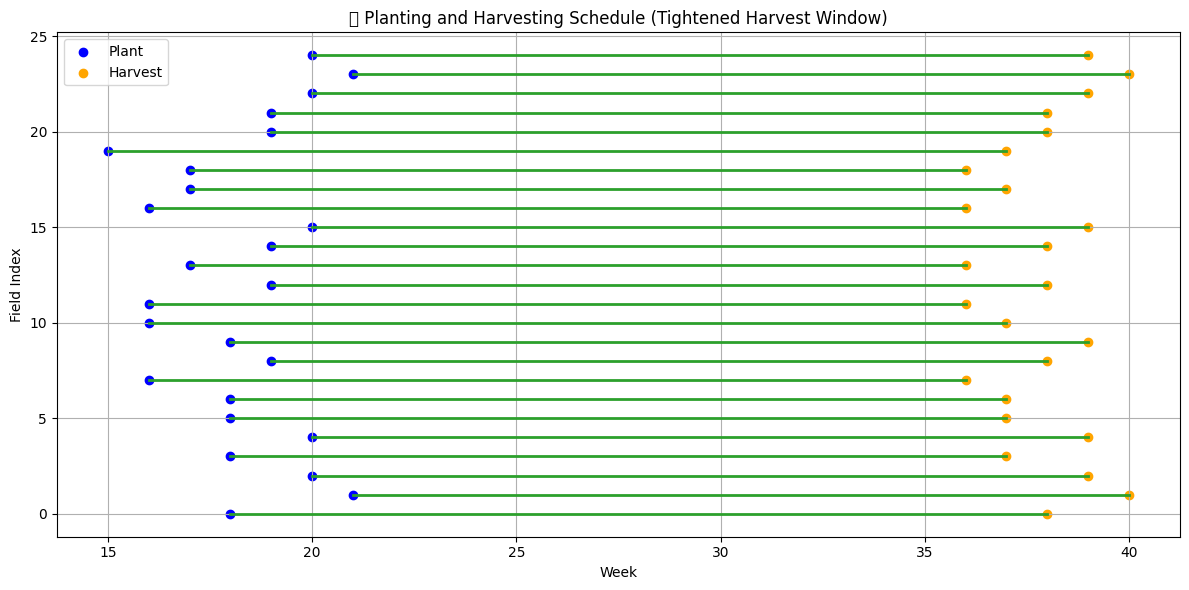

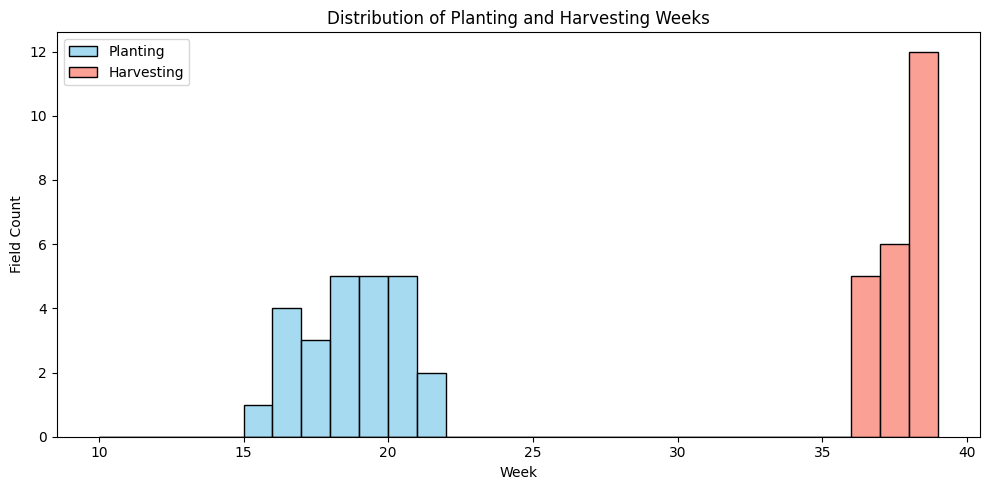

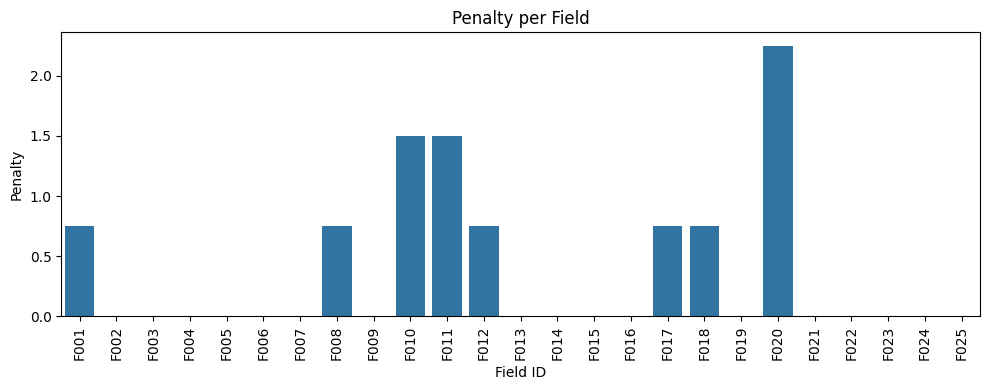

In [90]:
# Load the current output (tightened harvest window)
tightened_df = pd.read_csv("data/processed/schedule_output.csv")

# Plot 1: Gantt-style plot of planting and harvesting weeks
plt.figure(figsize=(12, 6))
for i, row in tightened_df.iterrows():
    plt.plot([row["plant_week"], row["harvest_week"]], [i, i], color="tab:green", linewidth=2)
    plt.scatter(row["plant_week"], i, color="blue", label="Plant" if i == 0 else "")
    plt.scatter(row["harvest_week"], i, color="orange", label="Harvest" if i == 0 else "")
plt.xlabel("Week")
plt.ylabel("Field Index")
plt.title("🌽 Planting and Harvesting Schedule (Tightened Harvest Window)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Histogram of Planting and Harvesting Weeks
plt.figure(figsize=(10, 5))
sns.histplot(tightened_df["plant_week"], bins=range(10, 40), kde=False, label="Planting", color="skyblue")
sns.histplot(tightened_df["harvest_week"], bins=range(10, 40), kde=False, label="Harvesting", color="salmon")
plt.xlabel("Week")
plt.ylabel("Field Count")
plt.title("Distribution of Planting and Harvesting Weeks")
plt.legend()
plt.tight_layout()
plt.show()

# Plot 3: Penalty Distribution
plt.figure(figsize=(10, 4))
sns.barplot(x="field_id", y="penalty", data=tightened_df)
plt.xticks(rotation=90)
plt.title("Penalty per Field")
plt.xlabel("Field ID")
plt.ylabel("Penalty")
plt.tight_layout()
plt.show()


In [ ]:
print(df[["field_id", "plant_week", "harvest_week", "penalty", "objective_makespan"]])

/tmp/ipykernel_5780/3680258052.py:18: UserWarning:

Glyph 127805 (\N{EAR OF MAIZE}) missing from font(s) DejaVu Sans.

/home/mak/Documents/Optimization/Project/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 127805 (\N{EAR OF MAIZE}) missing from font(s) DejaVu Sans.



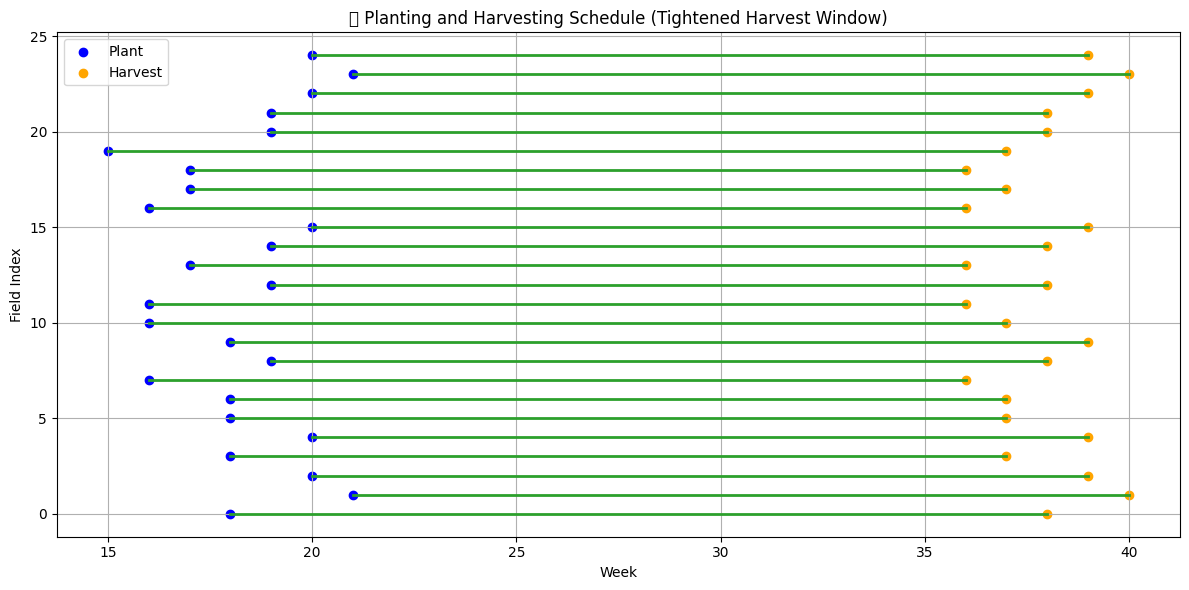

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the current output (tightened harvest window)
tightened_df = pd.read_csv("data/processed/schedule_output.csv")

# Plot 1: Gantt-style plot of planting and harvesting weeks
plt.figure(figsize=(12, 6))
for i, row in tightened_df.iterrows():
    plt.plot([row["plant_week"], row["harvest_week"]], [i, i], color="tab:green", linewidth=2)
    plt.scatter(row["plant_week"], i, color="blue", label="Plant" if i == 0 else "")
    plt.scatter(row["harvest_week"], i, color="orange", label="Harvest" if i == 0 else "")
plt.xlabel("Week")
plt.ylabel("Field Index")
plt.title("🌽 Planting and Harvesting Schedule (Tightened Harvest Window)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from datetime import datetime
from typing import List, Dict, Any
from src.optimization.milp_schedulerv4_fixed import build_and_solve_schedule_v4

# --- 1. Helper to sample weather/labor paths from historical data --- #
def sample_weather_labor(weather_df, labor_df, weeks, seed=None, labor_scale=1/6):
    rng = np.random.default_rng(seed)

    # Sample weather capacity_factor per week from historical weekly distributions
    sampled_weather = weather_df[weather_df["year"] < 2023].groupby("week")["capacity_factor"].apply(
        lambda x: rng.normal(x.mean(), x.std() or 0.01)
    ).reindex(weeks, fill_value=1.0)

    # Sample labor from historical census variability
    mean_labor = labor_df["total_workers"].mean()
    std_labor = labor_df["total_workers"].std()
    sampled_labor = rng.normal(mean_labor, std_labor or 1.0) * labor_scale

    return sampled_weather.clip(0.2, 1.2), sampled_labor

# --- 2. Function to run one simulation --- #
def run_simulation(
    i: int,
    weather_df: pd.DataFrame,
    labor_df: pd.DataFrame,
    base_config: Dict[str, Any],
    fields_path: str,
    weekly_master_path: str,
    seed: int = None,
) -> Dict[str, Any]:
    try:
        target_year = base_config["target_year"]

        # Load master weekly
        wm_df = pd.read_csv(weekly_master_path)
        weeks = wm_df[wm_df["year"] == target_year]["week"].unique()

        # Sample stochastic inputs
        sampled_weather, sampled_labor = sample_weather_labor(weather_df, labor_df, weeks, seed=seed)

        # Modify weekly master with sampled weather + labor
        wm_df.loc[wm_df["year"] == target_year, "capacity_factor"] = wm_df["week"].map(sampled_weather).fillna(1.0)
        wm_df.loc[wm_df["year"] == target_year, "labor_hours"] = sampled_labor

        # Save temporary version
        temp_path = f"/mnt/data/temp_wm_scenario_{i}.csv"
        wm_df.to_csv(temp_path, index=False)

        # Solve MILP with sampled input
        df_result = build_and_solve_schedule_v4(
            fields_path=fields_path,
            weekly_master_path=temp_path,
            target_year=target_year,
            base_planter_capacity=base_config["base_planter_capacity"],
            base_harvester_capacity=base_config["base_harvester_capacity"],
            labor_plant_per_acre=base_config["labor_plant_per_acre"],
            labor_harvest_per_acre=base_config["labor_harvest_per_acre"],
            early_penalty_weight=base_config["early_penalty_weight"],
            late_penalty_weight=base_config["late_penalty_weight"],
            time_limit=base_config.get("time_limit", 60),
        )

        # Summarize results
        return {
            "sim_id": i,
            "objective": df_result["objective_makespan"].max(),
            "penalty": df_result["penalty"].sum(),
            "num_late": (df_result["status"] == 3).sum(),
            "num_early": (df_result["status"] == 1).sum(),
        }

    except Exception as e:
        return {
            "sim_id": i,
            "objective": np.nan,
            "penalty": np.nan,
            "num_late": np.nan,
            "num_early": np.nan,
            "error": str(e),
        }

# --- 3. Run Monte Carlo in parallel --- #
def run_monte_carlo_simulation(
    n: int,
    weather_df: pd.DataFrame,
    labor_df: pd.DataFrame,
    base_config: Dict[str, Any],
    fields_path: str,
    weekly_master_path: str,
    n_jobs: int = -1,
) -> pd.DataFrame:
    print(f"Launching {n} Monte Carlo simulations...")
    results = Parallel(n_jobs=n_jobs)(
        delayed(run_simulation)(
            i,
            weather_df,
            labor_df,
            base_config,
            fields_path,
            weekly_master_path,
            seed=1000 + i,
        )
        for i in range(n)
    )
    return pd.DataFrame(results)

# --- 4. Plot results --- #
def plot_simulation_results(results_df: pd.DataFrame):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Makespan CDF
    results_df["objective"].dropna().sort_values().reset_index(drop=True).plot(
        ax=axes[0], title="CDF of Completion Time (Makespan)"
    )
    axes[0].set_ylabel("Weeks")
    axes[0].set_xlabel("Simulation (sorted)")

    # Penalty Histogram
    results_df["penalty"].hist(ax=axes[1], bins=20)
    axes[1].set_title("Histogram of Total Penalties")
    axes[1].set_xlabel("Penalty")

    # Bottleneck Analysis
    results_df["num_late"].hist(ax=axes[2], bins=20, alpha=0.7, label="Late")
    results_df["num_early"].hist(ax=axes[2], bins=20, alpha=0.7, label="Early")
    axes[2].legend()
    axes[2].set_title("Early vs Late Fields")
    plt.tight_layout()
    plt.show()
